In [ ]:
import Pkg

Pkg.add("GMT")
Pkg.add("PyPlot")
Pkg.add("GeophysicalModelGenerator")

Advance plotting

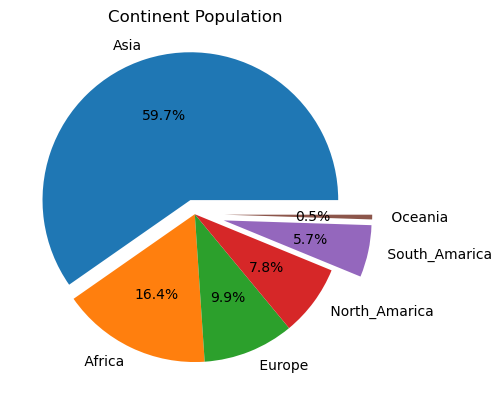

In [6]:
using PyPlot

Asia, Africa, Europe, North_Amarica, South_Amarica, Oceania = [4436224000, 1216130000, 738849000, 579024000, 422535000, 38304000]

sizes = [4436224000, 1216130000, 738849000, 579024000, 422535000, 38304000]
continents = ["Asia"," Africa"," Europe"," North_Amarica"," South_Amarica"," Oceania"]
labels = [x for x in continents]
pie(sizes, labels=continents,autopct="%1.1f%%", explode=(0.1,0,0,0,0.2,0.2))
title("Continent Population")

savefig("continent population.png",format="png")

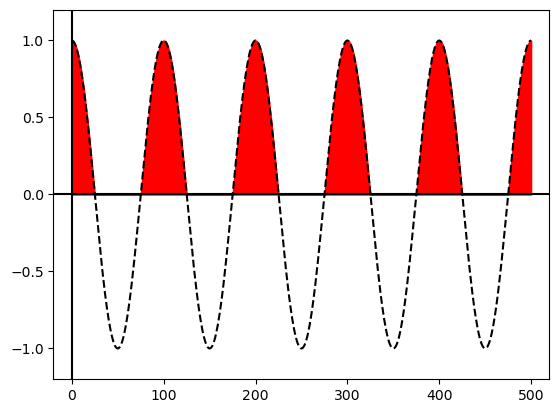

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000200192CDB80>

In [16]:
t = 0:500
A = [cos(2*pi*i/100) for i in t]

positive = [x >= 0 ? x : 0 for x in A]

PyPlot.xlim(-20, 520)
ylim(-1.2, 1.2)
plot(t, A, "k--")
fill_between(t, positive, color="r")
plot([0, 0, 0, 0, 0], [-2, -1, 0, 1, 2], "k")
plot([-20, 100, 250, 400, 520], [0, 0, 0, 0, 0], "k")

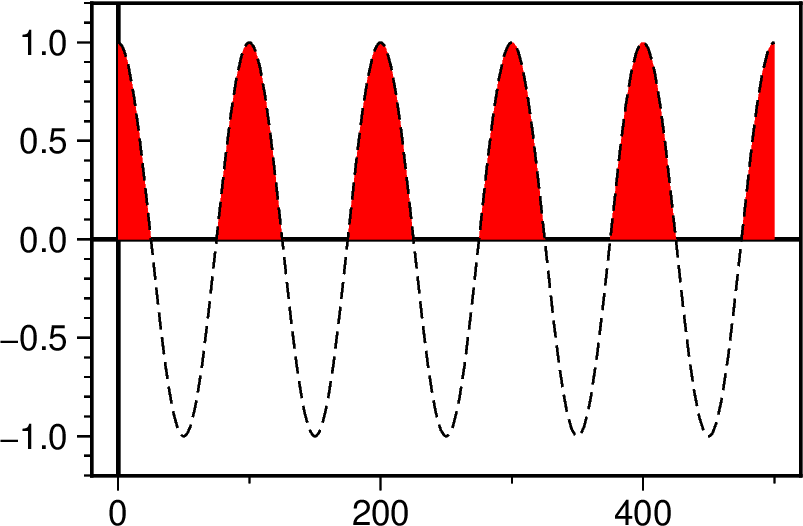

In [4]:
using GMT

t = linspace(0,500,501)
A = cos.(2*pi.*t/100)
positive = [x >= 0 ? x : 0.0 for x in A]

save_loc = "f:/julia/julia-ntou/julia/sine_wave.png"

gmtbegin()
GMT.plot(
	-20:520 , (-20:520)*0,
	pen = "1,black", 
	region = [-20, 520, -1.2, 1.2],  # Plot region
	figsize = [6, 4]  # Figure size
)
GMT.plot(
	(-2:2)*0, -2:2,
	pen = "1,black", 
	region = [-20, 520, -1.2, 1.2],  # Plot region
	figsize = [6, 4]  # Figure size
)
fill_between(
	# [t positive], [t 0*t],
	[t 0*t], [t positive], 
	pen = (0.5, "black@100", "-."),
	# color = "#FF0000",
	# fill = "red@70", # became completely transparent
	fill = ["black@100", "red@0"], # became completely transparent
	region = [-20, 520, -1.2, 1.2],
	figsize = [6, 4]
)
GMT.plot(
	t, A,
	pen = (0.5, "--"),  # Line styles and colors
	frame = (axes = :WStr),  # Axes on west and south, grid at x=0 and y=0
	# xlabel = "X-axis",
	# ylabel = "Y-axis",
	# title = "Sine Wave with Grid at x=0 and y=0",
	region = [-20, 520, -1.2, 1.2],  # Plot region
	figsize = [6, 4]  # Figure size
)
gmtend(show=1)


In [77]:
theta = linspace(-2π, 2π, 150);
y1 = sin.(theta) ./ theta;
y2 = sin.(2*theta) ./ theta;
# fill_between([theta y1], [theta y2], white=true, legend="Sinc1,Sinc2", show=1)
println(typeof(y1), " " , typeof(y2), " " ,typeof(theta))

Vector{Float64} Vector{Float64} StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}


In [ ]:
using GMT
gmthelp(psxy)

gmthelp(plot)

Option: R, or region, or limits => GMTgrid | NamedTuple |Tuple | Array | String

Option: J, or proj, or projection => NamedTuple | String

Option: B, or frame, or axes, or xaxis, or yaxis, or zaxis, or axis2, or xaxis2, or yaxis2 => NamedTuple | String

Option: a, or e, or f, or g, or l, or p, or t, or params => (Common options)

Option: D, or shift, or offset => Tuple | String | Number | Bool [Possibly not yet expanded]

Option: I, or intens => Tuple | String | Number | Bool [Possibly not yet expanded]

Option: N, or no_clip, or noclip => Tuple | String | Number | Bool [Possibly not yet expanded]

Option: A, or steps, or straight_lines => (x=?(x), y=?(y), meridian=?(m), parallel=?(p), )

Option: F, or conn, or connection => 
(continuous=?(c), net=?(n), network=?(n), refpoint=?(r), ignore_hdr=Any(a), single_group=Any(f), segments=Any(s), segments_reset=Any(r), anchor=?(), )

Option: C, or color, or cmap => GMTcpt | Tuple | Array | String | Number

Option: G, or fill => NamedTuple | Tuple | Array | String | Number

Option: G, or markerfacecolor, or MarkerFaceColor, or mc => NamedTuple | Tuple | Array | String | Number

Option: L, or close, or polygon => 
(left=Any(+xl), right=Any(+xr), x0=?(+x), bot=Any(+yb), top=Any(+yt), y0=?(+y), sym=Any(+d), asym=Any(+D)envelope=Any(+b), pen=?(+p), )

Option: W, or pen => NamedTuple | Tuple | String | Number

Option: S, or symbol => (symb=?(1), size=?(), unit=?(1), )

In [3]:
gmthelp(:C)

Option: B, or frame, or axes, or axis, or xaxis, or yaxis, or zaxis, or axis2, or xaxis2, or yaxis2 => NamedTuple | String


In [3]:
using GeophysicalModelGenerator, GMT
Topo = import_topo([115,130,18,26], file="@earth_relief_01m") # avoiding repeating download

GeoData 
  size      : (901, 481, 1)
  lon       ϵ [ 115.0 : 130.0]
  lat       ϵ [ 18.0 : 26.0]
  depth     ϵ [ -7.4695 : 3.4845]
  fields    : (:Topography,)


In [10]:
using GMT
gmtbegin("GMTplot.png")
lon = Topo.lon.val[:,1,1]
lat = Topo.lat.val[1,:,1]
depth = Topo.depth.val[:,:]'.*1000
coloring = GMT.makecpt(cmap=:geo, range=(-7000,3000,100));
GMT.pcolor(lon,lat,depth,cmap=coloring,region=[115,130,18,26],figsize=[100,50])
GMT.pscoast(region=[115,130,18,26],frame=(:WSne))
colorbar(cmap=coloring, frame=:auto,show=true)
gmtend(show=true)

Execise

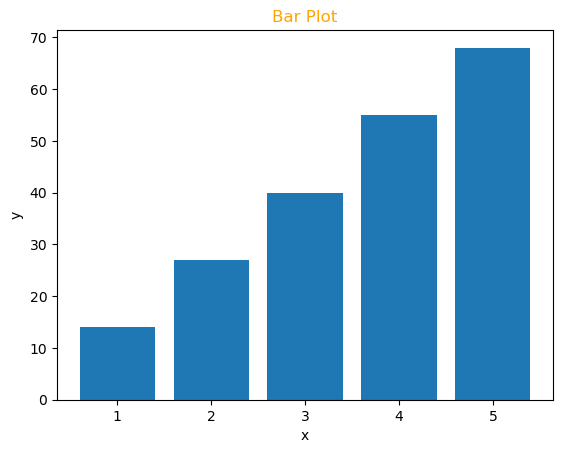

PyObject Text(24.000000000000007, 0.5, 'y')

In [17]:
x = [1,2,3,4,5]
y = [14,27,40,55,68]
bar(x, y)
title("Bar Plot", color="#ffa500")
xlabel("x")
ylabel("y")
# display(gcf())

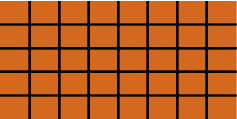

In [11]:
# chocolate for fun
gmtbegin()
fill_between([linspace(0,1000,1001) 0*linspace(0,1000,1001).^0], [linspace(0,1000,1001) 500*linspace(0,1000,1001).^0], pen=(0.5, "black@100", "-."), fill=["black@100","chocolate@0"], region=[0,1000,0,500], figsize=[2,1])
GMT.plot([125 125], [0 500], pen="0.5,black", region=[0,1000,0,500], figsize=[2,1])
GMT.plot([250 250], [0 500], pen="0.5,black", region=[0,1000,0,500], figsize=[2,1])
GMT.plot([375 375], [0 500], pen="0.5,black", region=[0,1000,0,500], figsize=[2,1])
GMT.plot([500 500], [0 500], pen="0.5,black", region=[0,1000,0,500], figsize=[2,1])
GMT.plot([625 625], [0 500], pen="0.5,black", region=[0,1000,0,500], figsize=[2,1])
GMT.plot([750 750], [0 500], pen="0.5,black", region=[0,1000,0,500], figsize=[2,1])
GMT.plot([875 875], [0 500], pen="0.5,black", region=[0,1000,0,500], figsize=[2,1])
GMT.plot([0 1000], [100 100], pen="0.5,black", region=[0,1000,0,500], figsize=[2,1])
GMT.plot([0 1000], [200 200], pen="0.5,black", region=[0,1000,0,500], figsize=[2,1])
GMT.plot([0 1000], [300 300], pen="0.5,black", region=[0,1000,0,500], figsize=[2,1])
GMT.plot([0 1000], [400 400], pen="0.5,black", region=[0,1000,0,500], figsize=[2,1])
gmtend(show=1)